In [1]:
# Random instance generator for the TSP problem

import networkx as nx
import typing


def generate_instance(n=200) -> typing.Tuple[nx.Graph, typing.List]:
    # generate n random points
    import random

    points = [(random.randint(0, 1000), random.randint(0, 1000)) for _ in range(n)]

    def eucl_dist(p1, p2):
        return round(((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2) ** 0.5)

    # create weighted graph
    G = nx.Graph()
    for i in range(n):
        for j in range(i + 1, n):
            G.add_edge(i, j, weight=eucl_dist(points[i], points[j]))
    return G, points

In [2]:
def draw_integral_solution(solution: nx.Graph, points: typing.List):
    import matplotlib.pyplot as plt

    plt.figure()
    plt.title("Integral Solution")
    # equal aspect ratio
    plt.gca().set_aspect("equal", adjustable="box")
    pos = {i: points[i] for i in range(len(points))}
    nx.draw(
        solution,
        pos,
        with_labels=False,
        node_size=10,
        node_color="blue",
        edge_color="black",
    )
    plt.show()


def draw_fractional_solution(solution: nx.Graph, points: typing.List):
    import matplotlib.pyplot as plt

    plt.figure()
    plt.title("Linear Relaxation")
    # equal aspect ratio
    plt.gca().set_aspect("equal", adjustable="box")
    pos = {i: points[i] for i in range(len(points))}
    # draw fractional edges in red. An edge is fractional if the attribute `x` is between 0.01 and 0.99
    for u, v, d in solution.edges(data=True):
        if 0.01 < d["x"] < 0.99:
            nx.draw(
                nx.Graph([(u, v)]),
                pos,
                with_labels=False,
                node_size=10,
                node_color="red",
                edge_color="red",
            )
    # draw integral edges in black. An edge is integral if the attribute `x` is > 0.99
    for u, v, d in solution.edges(data=True):
        if d["x"] > 0.99:
            nx.draw(
                nx.Graph([(u, v)]),
                pos,
                with_labels=False,
                node_size=10,
                node_color="blue",
                edge_color="black",
            )
    plt.show()


def draw_overlap(solution: nx.Graph, linear_relaxation: nx.Graph, points: typing.List):
    # draw the edges of the integral solution that have a value >= 0.5 in the fractional solution
    import matplotlib.pyplot as plt

    plt.figure()
    plt.title("Overlap")
    # equal aspect ratio
    plt.gca().set_aspect("equal", adjustable="box")
    # draw all nodes
    nx.draw(
        solution,
        points,
        with_labels=False,
        node_size=10,
        node_color="blue",
        edge_color="grey",
        width=0.1,
    )
    # draw the edges of the integral solution that have a value >= 0.5 in the fractional solution
    n = 0
    for u, v, d in solution.edges(data=True):
        # if not in linear relaxation, skip
        if not linear_relaxation.has_edge(u, v):
            continue
        if linear_relaxation[u][v]["x"] >= 0.5:
            nx.draw(
                nx.Graph([(u, v)]),
                points,
                with_labels=False,
                node_size=10,
                node_color="blue",
                edge_color="green",
            )
            n += 1

    plt.show()
    return n

In [3]:
from solution_dantzig import GurobiTspSolver
from solution_relaxation import GurobiTspRelaxationSolver

samples = []
n = 200


def get_sample():
    instance, points = generate_instance(n)

    print("Solving the linear relaxation")
    relaxation_solver = GurobiTspRelaxationSolver(instance)
    relaxation_solver.solve()
    relaxed_solution = relaxation_solver.get_solution()
    linear_relaxation_value = relaxation_solver.get_objective()
    assert relaxed_solution is not None
    #draw_fractional_solution(relaxed_solution, points)

    print("Solving the integral problem")
    solver = GurobiTspSolver(instance)
    solver.solve(30)
    solution = solver.get_solution()
    objective_value = solver.get_objective()
    assert solution is not None
    #draw_integral_solution(solution, points)
    overlap = draw_overlap(solution, relaxed_solution, points)
    print(
        f"Objective value: {objective_value}, Linear relaxation value: {linear_relaxation_value}, Overlap: {overlap}/{n}"
    )
    samples.append((objective_value, linear_relaxation_value, overlap))

Solving the linear relaxation
Set parameter Username
Academic license - for non-commercial use only - expires 2025-05-05
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 200 rows, 19900 columns and 39800 nonzeros
Model fingerprint: 0xd73d02f8
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.06s
Presolved: 200 rows, 19900 columns, 39800 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.990e+04
 Factor NZ  : 2.010e+04 (roughly 8 MB of memory)
 Factor Ops : 2.687e+06 (less than 1 second per iteration)
 Threads    : 1

Barrier performed 0 ite

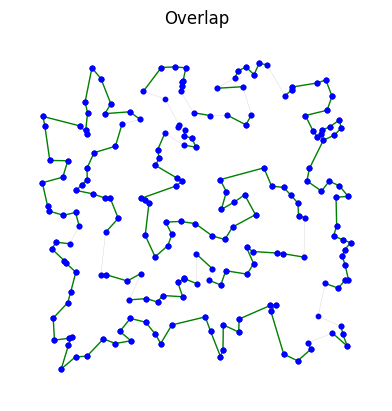

Objective value: 10270.0, Linear relaxation value: 10122.333333333334, Overlap: 181/200
There are now 1 samples
Solving the linear relaxation
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 200 rows, 19900 columns and 39800 nonzeros
Model fingerprint: 0x7cc60788
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.05s
Presolved: 200 rows, 19900 columns, 39800 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.01s

Barrier statistics:
 AA' NZ     : 1.990e+04
 Factor NZ  : 2.010e+04 (roughly 8 MB of memory)
 Factor Ops : 2.687e+06 (less than 1 second per iteration)
 Threads    : 1

Ba

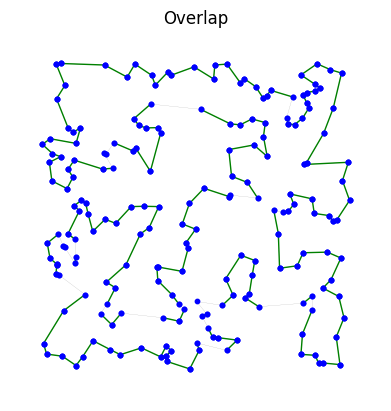

Objective value: 10515.0, Linear relaxation value: 10302.5, Overlap: 181/200
There are now 2 samples
Solving the linear relaxation
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 200 rows, 19900 columns and 39800 nonzeros
Model fingerprint: 0x7fa40b0b
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.05s
Presolved: 200 rows, 19900 columns, 39800 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.990e+04
 Factor NZ  : 2.010e+04 (roughly 8 MB of memory)
 Factor Ops : 2.687e+06 (less than 1 second per iteration)
 Threads    : 1

Barrier perfo

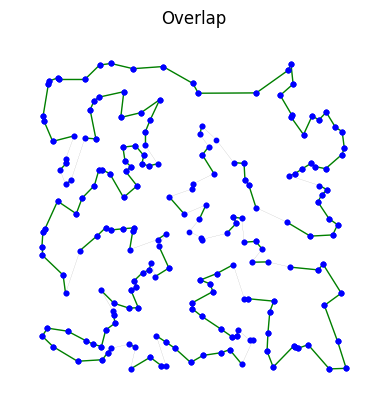

Objective value: 10601.0, Linear relaxation value: 10335.0, Overlap: 171/200
There are now 3 samples
Solving the linear relaxation
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 200 rows, 19900 columns and 39800 nonzeros
Model fingerprint: 0x9b2c407c
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.05s
Presolved: 200 rows, 19900 columns, 39800 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.01s

Barrier statistics:
 AA' NZ     : 1.990e+04
 Factor NZ  : 2.010e+04 (roughly 8 MB of memory)
 Factor Ops : 2.687e+06 (less than 1 second per iteration)
 Threads    : 1

Barrier perfo

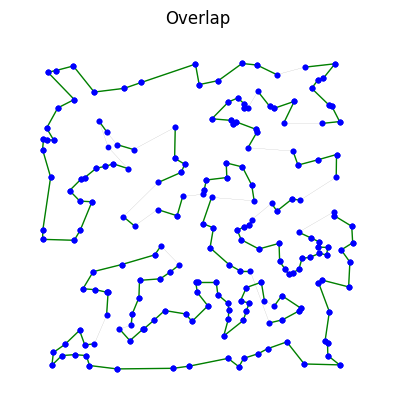

Objective value: 11348.0, Linear relaxation value: 10838.0, Overlap: 180/200
There are now 4 samples
Solving the linear relaxation
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 200 rows, 19900 columns and 39800 nonzeros
Model fingerprint: 0xf9bdc3b1
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.05s
Presolved: 200 rows, 19900 columns, 39800 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.990e+04
 Factor NZ  : 2.010e+04 (roughly 8 MB of memory)
 Factor Ops : 2.687e+06 (less than 1 second per iteration)
 Threads    : 1

Barrier perfo

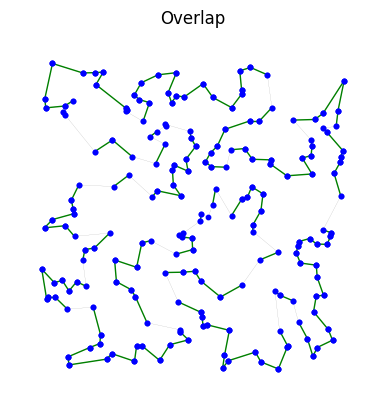

Objective value: 10600.0, Linear relaxation value: 10459.5, Overlap: 171/200
There are now 5 samples
Solving the linear relaxation
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 200 rows, 19900 columns and 39800 nonzeros
Model fingerprint: 0xd290e764
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.04s
Presolved: 200 rows, 19900 columns, 39800 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.02s

Barrier statistics:
 AA' NZ     : 1.990e+04
 Factor NZ  : 2.010e+04 (roughly 8 MB of memory)
 Factor Ops : 2.687e+06 (less than 1 second per iteration)
 Threads    : 1

Barrier perfo

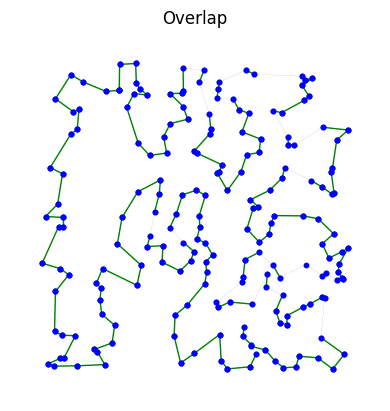

Objective value: 10626.0, Linear relaxation value: 10305.0, Overlap: 180/200
There are now 6 samples
Solving the linear relaxation
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 200 rows, 19900 columns and 39800 nonzeros
Model fingerprint: 0x78a1b95b
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.05s
Presolved: 200 rows, 19900 columns, 39800 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.990e+04
 Factor NZ  : 2.010e+04 (roughly 8 MB of memory)
 Factor Ops : 2.687e+06 (less than 1 second per iteration)
 Threads    : 1

Barrier perfo

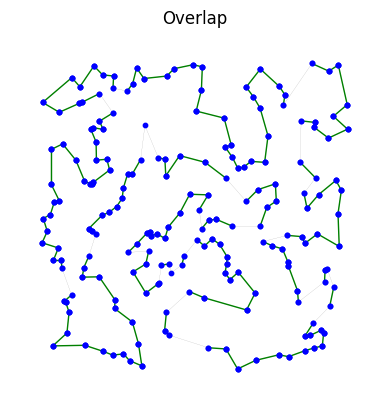

Objective value: 10544.0, Linear relaxation value: 10368.375, Overlap: 177/200
There are now 7 samples
Solving the linear relaxation
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 200 rows, 19900 columns and 39800 nonzeros
Model fingerprint: 0x867d50f3
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.05s
Presolved: 200 rows, 19900 columns, 39800 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.990e+04
 Factor NZ  : 2.010e+04 (roughly 8 MB of memory)
 Factor Ops : 2.687e+06 (less than 1 second per iteration)
 Threads    : 1

Barrier per

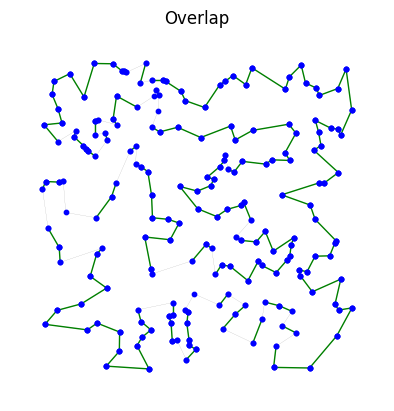

Objective value: 11131.0, Linear relaxation value: 11046.0, Overlap: 171/200
There are now 8 samples
Solving the linear relaxation
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 200 rows, 19900 columns and 39800 nonzeros
Model fingerprint: 0x1d028ddb
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.05s
Presolved: 200 rows, 19900 columns, 39800 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.990e+04
 Factor NZ  : 2.010e+04 (roughly 8 MB of memory)
 Factor Ops : 2.687e+06 (less than 1 second per iteration)
 Threads    : 1

Barrier perfo

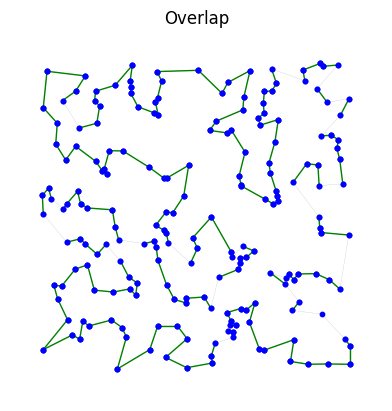

Objective value: 10801.0, Linear relaxation value: 10612.75, Overlap: 179/200
There are now 9 samples
Solving the linear relaxation
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 200 rows, 19900 columns and 39800 nonzeros
Model fingerprint: 0x7edff416
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.04s
Presolved: 200 rows, 19900 columns, 39800 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.01s

Barrier statistics:
 AA' NZ     : 1.990e+04
 Factor NZ  : 2.010e+04 (roughly 8 MB of memory)
 Factor Ops : 2.687e+06 (less than 1 second per iteration)
 Threads    : 1

Barrier perf

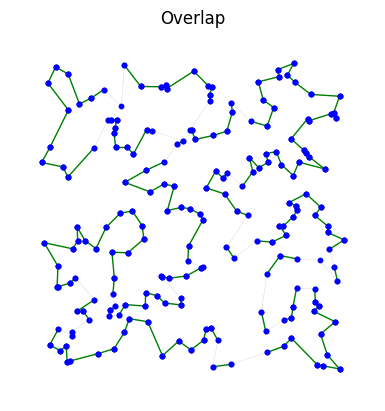

Objective value: 10667.0, Linear relaxation value: 10429.0, Overlap: 175/200
There are now 10 samples
Solving the linear relaxation
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 200 rows, 19900 columns and 39800 nonzeros
Model fingerprint: 0xea0142f1
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.04s
Presolved: 200 rows, 19900 columns, 39800 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.990e+04
 Factor NZ  : 2.010e+04 (roughly 8 MB of memory)
 Factor Ops : 2.687e+06 (less than 1 second per iteration)
 Threads    : 1

Barrier perf

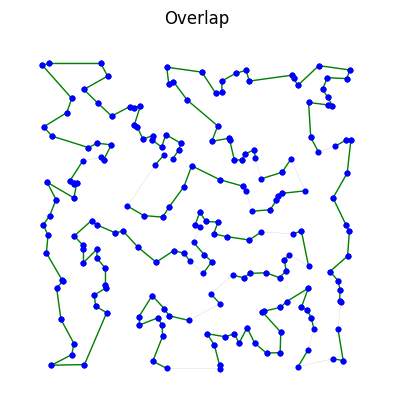

Objective value: 10972.0, Linear relaxation value: 10823.5, Overlap: 183/200
There are now 11 samples
Solving the linear relaxation
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 200 rows, 19900 columns and 39800 nonzeros
Model fingerprint: 0xbc28d6b5
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.04s
Presolved: 200 rows, 19900 columns, 39800 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.01s

Barrier statistics:
 AA' NZ     : 1.990e+04
 Factor NZ  : 2.010e+04 (roughly 8 MB of memory)
 Factor Ops : 2.687e+06 (less than 1 second per iteration)
 Threads    : 1

Barrier perf

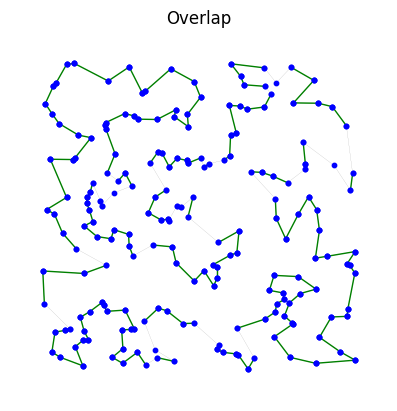

Objective value: 10795.0, Linear relaxation value: 10725.0, Overlap: 174/200
There are now 12 samples
Solving the linear relaxation
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 200 rows, 19900 columns and 39800 nonzeros
Model fingerprint: 0xc4d1357f
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.05s
Presolved: 200 rows, 19900 columns, 39800 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.990e+04
 Factor NZ  : 2.010e+04 (roughly 8 MB of memory)
 Factor Ops : 2.687e+06 (less than 1 second per iteration)
 Threads    : 1

Barrier perf

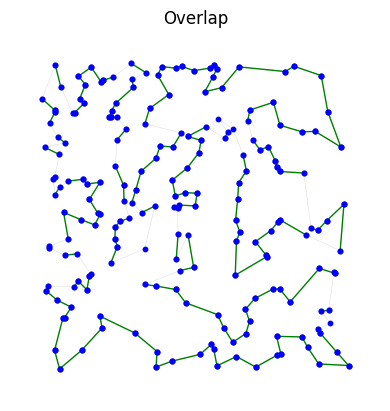

Objective value: 11183.0, Linear relaxation value: 10543.5, Overlap: 166/200
There are now 13 samples
Solving the linear relaxation
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 200 rows, 19900 columns and 39800 nonzeros
Model fingerprint: 0x5e7ce548
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.04s
Presolved: 200 rows, 19900 columns, 39800 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.01s

Barrier statistics:
 AA' NZ     : 1.990e+04
 Factor NZ  : 2.010e+04 (roughly 8 MB of memory)
 Factor Ops : 2.687e+06 (less than 1 second per iteration)
 Threads    : 1

Barrier perf

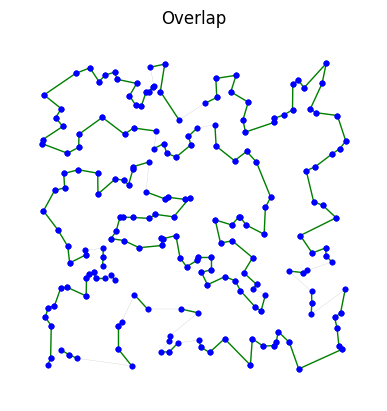

Objective value: 10274.0, Linear relaxation value: 10165.0, Overlap: 181/200
There are now 14 samples
Solving the linear relaxation
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 200 rows, 19900 columns and 39800 nonzeros
Model fingerprint: 0x8743b295
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.04s
Presolved: 200 rows, 19900 columns, 39800 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.990e+04
 Factor NZ  : 2.010e+04 (roughly 8 MB of memory)
 Factor Ops : 2.687e+06 (less than 1 second per iteration)
 Threads    : 1

Barrier perf

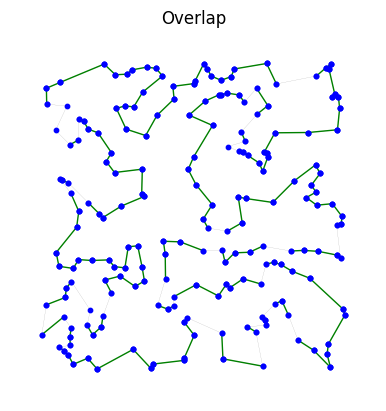

Objective value: 10739.0, Linear relaxation value: 10617.0, Overlap: 171/200
There are now 15 samples
Solving the linear relaxation
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 200 rows, 19900 columns and 39800 nonzeros
Model fingerprint: 0xe3b44996
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.04s
Presolved: 200 rows, 19900 columns, 39800 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.990e+04
 Factor NZ  : 2.010e+04 (roughly 8 MB of memory)
 Factor Ops : 2.687e+06 (less than 1 second per iteration)
 Threads    : 1

Barrier perf

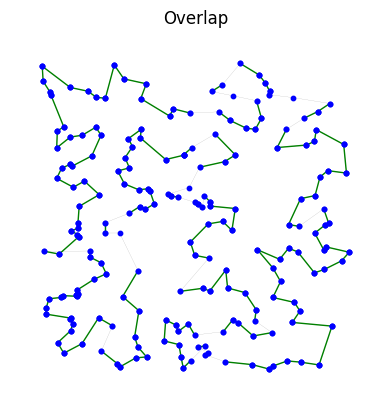

Objective value: 10548.0, Linear relaxation value: 10359.875, Overlap: 176/200
There are now 16 samples
Solving the linear relaxation
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 200 rows, 19900 columns and 39800 nonzeros
Model fingerprint: 0xe15328c5
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.05s
Presolved: 200 rows, 19900 columns, 39800 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.01s

Barrier statistics:
 AA' NZ     : 1.990e+04
 Factor NZ  : 2.010e+04 (roughly 8 MB of memory)
 Factor Ops : 2.687e+06 (less than 1 second per iteration)
 Threads    : 1

Barrier pe

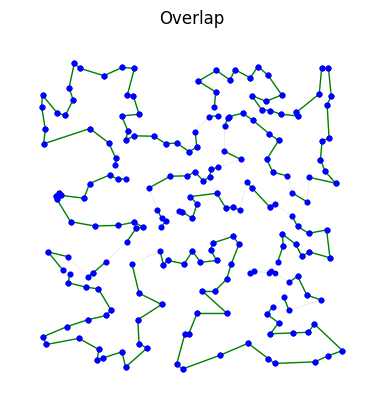

Objective value: 10913.0, Linear relaxation value: 10805.999999999998, Overlap: 177/200
There are now 17 samples
Solving the linear relaxation
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 200 rows, 19900 columns and 39800 nonzeros
Model fingerprint: 0xd6e0f191
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.05s
Presolved: 200 rows, 19900 columns, 39800 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.990e+04
 Factor NZ  : 2.010e+04 (roughly 8 MB of memory)
 Factor Ops : 2.687e+06 (less than 1 second per iteration)
 Threads    : 1

B

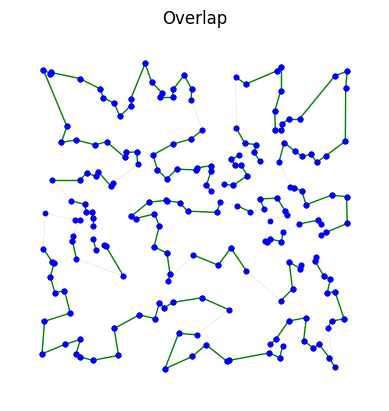

Objective value: 10868.0, Linear relaxation value: 10705.416666666666, Overlap: 175/200
There are now 18 samples
Solving the linear relaxation
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 200 rows, 19900 columns and 39800 nonzeros
Model fingerprint: 0x2b7f7e75
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.04s
Presolved: 200 rows, 19900 columns, 39800 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.990e+04
 Factor NZ  : 2.010e+04 (roughly 8 MB of memory)
 Factor Ops : 2.687e+06 (less than 1 second per iteration)
 Threads    : 1

B

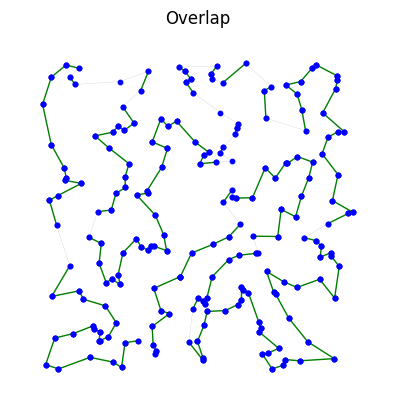

Objective value: 10697.0, Linear relaxation value: 10566.5, Overlap: 179/200
There are now 19 samples
Solving the linear relaxation
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 200 rows, 19900 columns and 39800 nonzeros
Model fingerprint: 0x4217c4eb
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.04s
Presolved: 200 rows, 19900 columns, 39800 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.01s

Barrier statistics:
 AA' NZ     : 1.990e+04
 Factor NZ  : 2.010e+04 (roughly 8 MB of memory)
 Factor Ops : 2.687e+06 (less than 1 second per iteration)
 Threads    : 1

Barrier perf

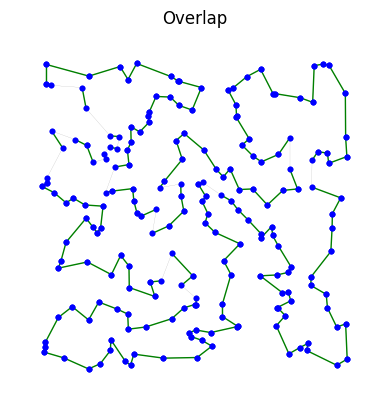

Objective value: 10792.0, Linear relaxation value: 10604.0, Overlap: 185/200
There are now 20 samples


In [4]:
# Run me to get a sample on linear relaxation and integral solution
for i in range(20):
    get_sample()
    print(f"There are now {len(samples)} samples")

In [5]:
for i, (objective_value, linear_relaxation_value, overlap) in enumerate(samples):
    print(
        f"Sample {i}: Objective value: {objective_value}, Linear relaxation value: {linear_relaxation_value}, Overlap: {overlap}/{n}"
    )

#compute average overlap of samples and average similarity
average_overlap = sum(overlap/n for _,_,overlap in samples) / len(samples)
average_similarity = sum(lin_val/obj_val for obj_val, lin_val,_ in samples) / len(samples)

print(f"The average overlap of the samples is: {average_overlap}. The average similarity of the samples is: {average_similarity}")


Sample 0: Objective value: 10270.0, Linear relaxation value: 10122.333333333334, Overlap: 181/200
Sample 1: Objective value: 10515.0, Linear relaxation value: 10302.5, Overlap: 181/200
Sample 2: Objective value: 10601.0, Linear relaxation value: 10335.0, Overlap: 171/200
Sample 3: Objective value: 11348.0, Linear relaxation value: 10838.0, Overlap: 180/200
Sample 4: Objective value: 10600.0, Linear relaxation value: 10459.5, Overlap: 171/200
Sample 5: Objective value: 10626.0, Linear relaxation value: 10305.0, Overlap: 180/200
Sample 6: Objective value: 10544.0, Linear relaxation value: 10368.375, Overlap: 177/200
Sample 7: Objective value: 11131.0, Linear relaxation value: 11046.0, Overlap: 171/200
Sample 8: Objective value: 10801.0, Linear relaxation value: 10612.75, Overlap: 179/200
Sample 9: Objective value: 10667.0, Linear relaxation value: 10429.0, Overlap: 175/200
Sample 10: Objective value: 10972.0, Linear relaxation value: 10823.5, Overlap: 183/200
Sample 11: Objective value: 